# 泰坦尼克号乘客生存情况预测分析
## 第三部分 建模及模型评价

---
  
　ID：wlong
　数据分析爱好者、目前小白一枚
　邮箱：wlong826@163.com
　CSDN：**[【数分小白龙】](https://blog.csdn.net/qq_38230663)**
　如果有不完善的地方，欢迎小伙伴评论区留言！
　最每周都会有所更新，欢迎大家**关注点赞分享fork**哦！
 
---

　刚入门对Pandas感兴趣的小伙伴，看这👉：[【Pandas数据处理120题知识点总结】](https://www.heywhale.com/mw/project/60c0b06919d601001898394c)
 
　如果有想学习爬虫的小伙伴，看这👉：[【零基础入门Python爬虫--豆瓣、58同城、安居客等】](https://www.heywhale.com/mw/project/60be1fa8acdcb3001707b133)

- 本文的参考项目:

    - [Kaggle之泰坦尼克号问题](https://www.heywhale.com/mw/project/5e898c2295b029002ca8d8ce)
    
    - [Kaggle入门：逻辑回归应用之Kaggle泰坦尼克之灾 ](https://www.heywhale.com/mw/project/5bfe39b3954d6e0010681cd1)
    
    - [33题实战“泰坦尼克号生存预测”全流程](https://www.heywhale.com/mw/project/5e746b7a98d4a8002d2b0615)
    

## 1. 数据分离

　　将经过特征工程处理后的数据分开，分成最初的训练数据和测试数据；

### 1.1 读取数据

In [1]:
import pandas as pd
train = pd.read_csv('/home/mw/input/wlong9812/train.csv')
test = pd.read_csv('/home/mw/input/wlong9812/test.csv')
truth = pd.read_csv('/home/mw/input/wlong9812/gender_submission.csv')
train_and_test = pd.read_csv('/home/mw/input/wlong9812/经过特征工程处理后的数据.csv')
PassengerId = test['PassengerId']

### 1.2 划分训练集和测试集

In [2]:
index = PassengerId[0] - 1
train_and_test_drop = train_and_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
train_data = train_and_test_drop[:index]
test_data = train_and_test_drop[index:]

train_X = train_data.drop(['Survived'], axis=1)
train_y = train_data['Survived']
test_X = test_data.drop(['Survived'], axis=1)
test_y = truth['Survived']
train_X.shape, train_y.shape, test_X.shape

((891, 28), (891,), (418, 28))

**注：以下模型建模时，均使用默认参数，不涉及过多参数调优、交叉验证、复杂模型等，主要旨在比较再默认参数下不同模型的差异；**

## 2. 建模及模型评价

　　本小章节主要实现建模及模型评价部分，为了简便起见，直接调用sklearn现成的函数，所有模型均采用默认参数，不涉及过多参数调优、算法优化等复杂过程，由于能力有限，这里只列举了一些常见的基础模型和集成模型，至于其他模型，读者可自行查阅资料补充；
  
　　关于算法优化等稍微复杂的建模，期待后续的更新，正在快马加鞭准备中．．．ヾ(≧▽≦*)o

In [3]:
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.svm import SVC # 支持向量机
from sklearn.neighbors import KNeighborsClassifier # K最近邻
from sklearn.tree import DecisionTreeClassifier # 决策树
from sklearn.ensemble import GradientBoostingClassifier # 梯度提升树GBDT
import lightgbm as lgb # LightGBM算法
from xgboost.sklearn import XGBClassifier # XGBoost算法
from sklearn.ensemble import ExtraTreesClassifier # 极端随机树
from sklearn.ensemble import AdaBoostClassifier # 
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import roc_auc_score # 准确率评价模型好坏
import warnings
warnings.filterwarnings("ignore")

### 2.1 逻辑回归

In [4]:
lr = LogisticRegression() # logit 逻辑回归
lr.fit(train_X, train_y)
pred_lr = lr.predict(test_X) 
accuracy_lr = roc_auc_score(test_y, pred_lr)
print("逻辑回归的预测结果：", accuracy_lr)

逻辑回归的预测结果： 0.9107142857142857


### 2.2 随机森林-RF

In [5]:
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)
pred_rfc = rfc.predict(test_X)
accuracy_rfc = roc_auc_score(test_y, pred_rfc) 
print("随机森林的预测结果：", accuracy_rfc)

随机森林的预测结果： 0.8468045112781954


### 2.3 支持向量机-SVM

In [6]:
svm = SVC()
svm.fit(train_X,train_y)
pred_svm = svm.predict(test_X)
accuracy_svm = roc_auc_score(test_y, pred_svm) 
print("支持向量机的预测结果：", accuracy_svm)

支持向量机的预测结果： 0.6470864661654135


### 2.4 K最近邻-KNN

In [7]:
knn = KNeighborsClassifier()
knn.fit(train_X,train_y)
pred_knn = knn.predict(test_X)
accuracy_knn = roc_auc_score(test_y, pred_knn) 
print("K最近邻分类器的预测结果：", accuracy_knn)

K最近邻分类器的预测结果： 0.6973684210526316


### 2.5 决策树

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X,train_y)
pred_dtree = dtree.predict(test_X)
accuracy_dtree = roc_auc_score(test_y, pred_dtree) 
print("决策树模型的预测结果：", accuracy_dtree)

决策树模型的预测结果： 0.7659774436090226


### 2.6 梯度提升决策树-GBDT

In [9]:
gbdt = GradientBoostingClassifier()
gbdt.fit(train_X, train_y)
pred_gbdt = gbdt.predict(test_X)
accuracy_gbdt = roc_auc_score(test_y, pred_gbdt) 
print("GBDT模型的预测结果：", accuracy_gbdt)

GBDT模型的预测结果： 0.8585526315789473


### 2.7 LightGBM算法

In [10]:
lgb_train = lgb.Dataset(train_X, train_y)
lgb_eval = lgb.Dataset(test_X, test_y, reference = lgb_train)

gbm = lgb.train(params = {}, train_set = lgb_train, valid_sets = lgb_eval)
pred_lgb = gbm.predict(test_X, num_iteration = gbm.best_iteration)
accuracy_lgb = roc_auc_score(test_y, pred_lgb) 
print("LightGBM模型的预测结果：", accuracy_lgb)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 383
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 26
[LightGBM] [Info] Start training from score 0.383838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM模型的预测结果： 0.904827859121488


### 2.8 XGBoost算法

In [11]:
xgbc = XGBClassifier()
xgbc.fit(train_X, train_y)
pred_xgbc = xgbc.predict(test_X)
accuracy_xgbc = roc_auc_score(test_y, pred_xgbc) 
print("XGBoost模型的预测结果：", accuracy_xgbc)

[17:25:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost模型的预测结果： 0.8124999999999999


### 2.9 极端随机树

In [12]:
etree = ExtraTreesClassifier()
etree.fit(train_X, train_y)
pred_etree = etree.predict(test_X)
accuracy_etree = roc_auc_score(test_y, pred_etree)
print("极端随机树模型的预测结果：", accuracy_etree)

极端随机树模型的预测结果： 0.8289473684210527


### 2.10 AdaBoost算法

In [13]:
abc = AdaBoostClassifier()
abc.fit(train_X, train_y)
pred_abc = abc.predict(test_X)
accuracy_abc = roc_auc_score(test_y, pred_abc) 
print("AdaBoost模型的预测结果：", accuracy_abc)

AdaBoost模型的预测结果： 0.8674812030075187


### 2.11 基于Bagging的K最近邻

In [14]:
bag_knn = BaggingClassifier(KNeighborsClassifier())
bag_knn.fit(train_X, train_y)
pred_bag_knn = bag_knn.predict(test_X)
accuracy_bag_knn = roc_auc_score(test_y, pred_bag_knn)
print("基于Bagging的K紧邻模型的预测结果：", accuracy_bag_knn)

基于Bagging的K紧邻模型的预测结果： 0.7020676691729324


### 2.12 基于Bagging的决策树

In [15]:
bag_dt = BaggingClassifier(DecisionTreeClassifier())
bag_dt.fit(train_X, train_y)
pred_bag_dt = bag_dt.predict(test_X)
accuracy_bag_dt = roc_auc_score(test_y, pred_bag_dt)
print("基于Bagging的决策树模型的预测结果：", accuracy_bag_dt)

基于Bagging的决策树模型的预测结果： 0.8237781954887219


## 3. 小结

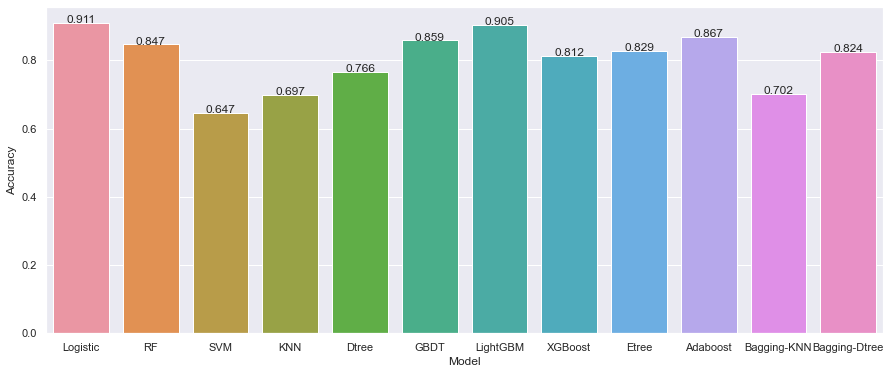

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(15,6)}) # 设置画布大小
accuracys = [accuracy_lr, accuracy_rfc, accuracy_svm, accuracy_knn, accuracy_dtree, accuracy_gbdt, accuracy_lgb,accuracy_xgbc, accuracy_etree, accuracy_abc, accuracy_bag_knn, accuracy_bag_dt, ]
models = ['Logistic', 'RF', 'SVM', 'KNN', 'Dtree', 'GBDT', 'LightGBM', 'XGBoost', 'Etree', 'Adaboost', 'Bagging-KNN', 'Bagging-Dtree']
bar = sns.barplot(x=models, y=accuracys)

# 显示数值标签
for x, y in enumerate(accuracys):
    plt.text(x, y, '%s'% round(y,3), ha='center')

plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

　　根据上述条形图可以看出，在**全部模型默认参数**的情况下，**逻辑回归**的预测准确率最高，达到了0.911，其次是**LightGBM**模型，也在0.9以上，达到80%准确率以上的模型有RF、GBDT、XGBoost、ETree、Adaboost以及基于Bagging的决策树，其他模型的预测准确率则较低；

　　由于本文所涉及到模型均没有进行算法优化，所以只能简单看下**在默认参数情况下**模型之间预测准确率的比较，但上述结果并不能代表每个模型预测准确率的*上限*，比如有的模型在默认参数时准确率很低，但通过**调参、算法优化**可能就会变得很高。本小章节主要面向**初学者**，来对算法预测有个基本了解，能学会简单运用，至于后续的**算法优化**部分，期待后续的更新哦！